In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
import datetime as dt
# CSV 파일 로드
df = pd.read_csv('Source.csv')

# 날짜와 시간을 숫자형으로 변환
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].map(dt.datetime.toordinal)
# 'direction' 열을 원-핫 인코딩
df = pd.get_dummies(df, columns=['direction'])

# 이제 'direction' 열은 여러 개의 숫자형 열로 변환되었습니다.
# 'region' 열을 원-핫 인코딩
df = pd.get_dummies(df, columns=['region'])

# 이제 'region' 열은 여러 개의 숫자형 열로 변환되었습니다.
# 예측하려는 열을 선택 (여기서는 'target'이라고 가정)
target = df['AQI']

# 'target' 열을 제외한 모든 열을 특성으로 사용
features = df.drop('AQI', axis=1)

# 데이터를 훈련 세트와 테스트 세트로 분할
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=1)

# 선형 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(features_train, target_train)

# 테스트 세트에 대한 예측 수행
target_pred = model.predict(features_test)

# 예측의 정확도 평가
print('Mean Absolute Error:', metrics.mean_absolute_error(target_test, target_pred))
print('Mean Squared Error:', metrics.mean_squared_error(target_test, target_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(target_test, target_pred)))

Mean Absolute Error: 10.972406476498508
Mean Squared Error: 199.53717545247068
Root Mean Squared Error: 14.125762827276645


DatetimeIndex(['2022-08-04 00:00:00', '2022-08-04 01:00:00',
               '2022-08-04 02:00:00', '2022-08-04 03:00:00',
               '2022-08-04 04:00:00', '2022-08-04 05:00:00',
               '2022-08-04 06:00:00', '2022-08-04 07:00:00',
               '2022-08-04 08:00:00', '2022-08-04 09:00:00',
               ...
               '2024-05-01 14:00:00', '2024-05-01 15:00:00',
               '2024-05-01 16:00:00', '2024-05-01 17:00:00',
               '2024-05-01 18:00:00', '2024-05-01 19:00:00',
               '2024-05-01 20:00:00', '2024-05-01 21:00:00',
               '2024-05-01 22:00:00', '2024-05-01 23:00:00'],
              dtype='datetime64[ns]', name='date', length=31272, freq=None)
2024-06-01    44.005995
2024-06-02    46.709209
2024-06-03    40.422840
2024-06-04    42.268316
2024-06-05    41.649005
2024-06-06    41.679046
2024-06-07    47.047900
2024-06-08    49.412127
2024-06-09    43.273472
2024-06-10    48.560184
2024-06-11    42.539796
2024-06-12    40.800890
Freq: 

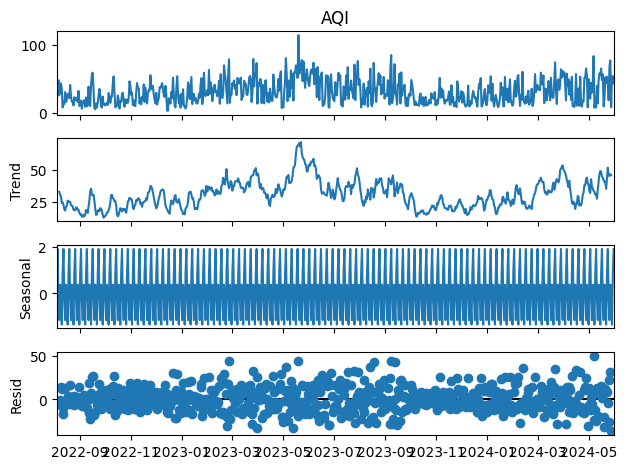

In [39]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

# 데이터 로드 
df = pd.read_csv('Source.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
# 중복된 인덱스 확인
print(df.index[df.index.duplicated()])

# 중복된 인덱스 제거 (첫 번째 출현을 제외하고 모두 제거)
df = df[~df.index.duplicated(keep='first')]

# 데이터의 빈도 설정 (예: 매일 데이터인 경우 'D')
df = df.asfreq('D')



# 시계열 데이터의 계절성 분해를 통해 계절성 패턴 확인 (옵션)
result = seasonal_decompose(df['AQI'], model='additive')
result.plot()

# SARIMA 모델 구성 및 훈련
# (p, d, q)는 비계절적 파라미터, (P, D, Q, s)는 계절적 파라미터
# 이 파라미터들은 데이터에 따라 최적화가 필요
model = SARIMAX(df['AQI'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

# 미래 값 예측
forecast = model_fit.forecast(steps=12)

# 예측 결과 출력
print(forecast)

In [38]:
# 중복된 인덱스 확인
print(df.index[df.index.duplicated()])

# 중복된 인덱스 제거 (첫 번째 출현을 제외하고 모두 제거)
df = df[~df.index.duplicated(keep='first')]

# 데이터의 빈도 설정 (예: 매일 데이터인 경우 'D')
df = df.asfreq('D')


DatetimeIndex(['2022-08-04 00:00:00', '2022-08-04 01:00:00',
               '2022-08-04 02:00:00', '2022-08-04 03:00:00',
               '2022-08-04 04:00:00', '2022-08-04 05:00:00',
               '2022-08-04 06:00:00', '2022-08-04 07:00:00',
               '2022-08-04 08:00:00', '2022-08-04 09:00:00',
               ...
               '2024-05-01 14:00:00', '2024-05-01 15:00:00',
               '2024-05-01 16:00:00', '2024-05-01 17:00:00',
               '2024-05-01 18:00:00', '2024-05-01 19:00:00',
               '2024-05-01 20:00:00', '2024-05-01 21:00:00',
               '2024-05-01 22:00:00', '2024-05-01 23:00:00'],
              dtype='datetime64[ns]', name='date', length=31272, freq=None)


Region: China


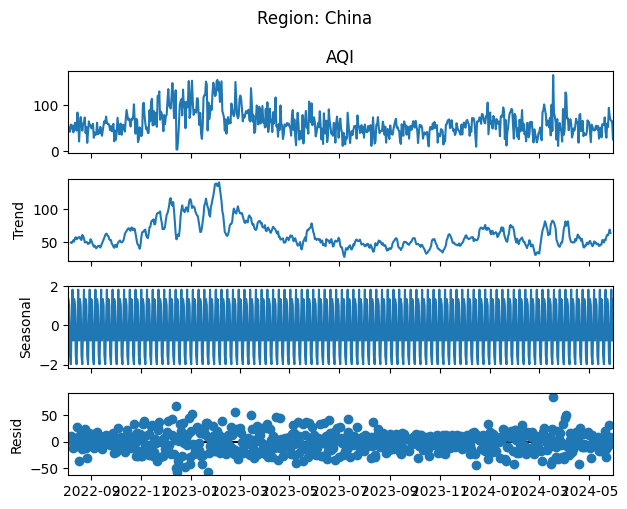

Region: Europa


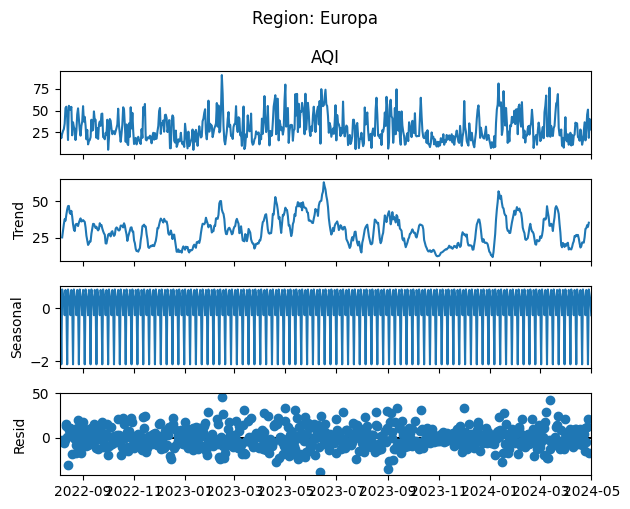

Region: USA


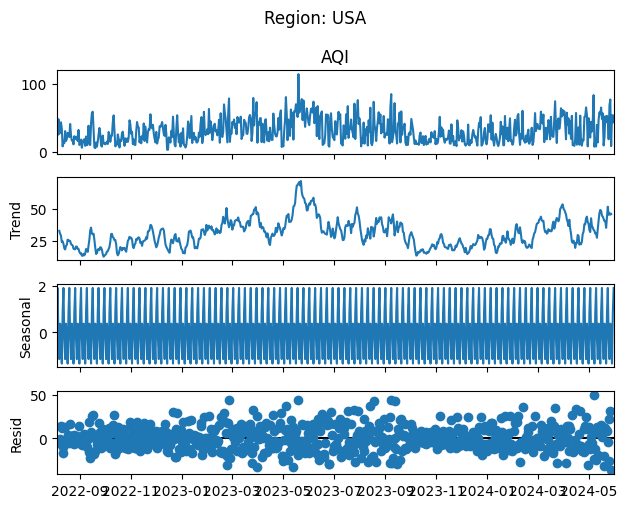

In [44]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('Source.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# region 별로 그룹화
grouped = df.groupby('region')

for name, group in grouped:
    print(f"Region: {name}")
    # 중복된 인덱스 확인 및 제거
    if group.index.duplicated().any():
        group = group[~group.index.duplicated(keep='first')]
    
    # 데이터의 빈도 설정 (예: 매일 데이터인 경우 'D')
    group = group.asfreq('D')
    
    # 시계열 데이터의 계절성 분해 (옵션)
    result = seasonal_decompose(group['AQI'], model='additive')
    fig = result.plot()
    fig.suptitle(f"Region: {name}", y=1.05)  # y 매개변수로 제목 위치 조정
    plt.show()
    

Region: China


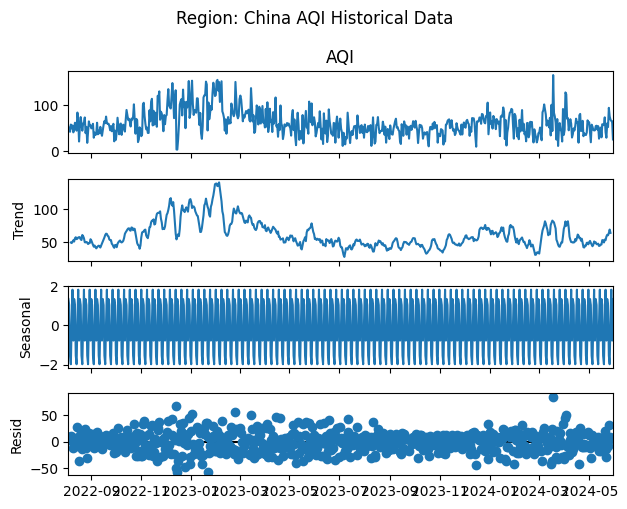

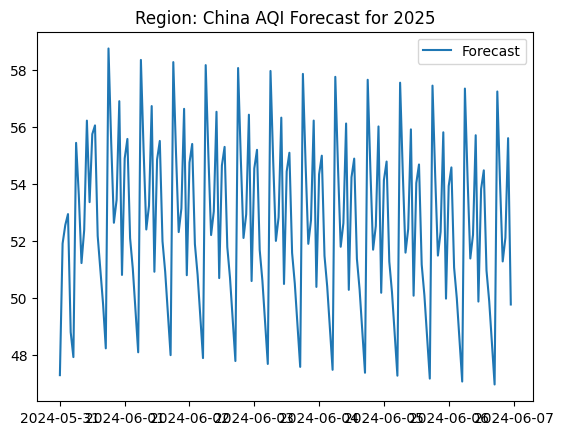

Region: Europa


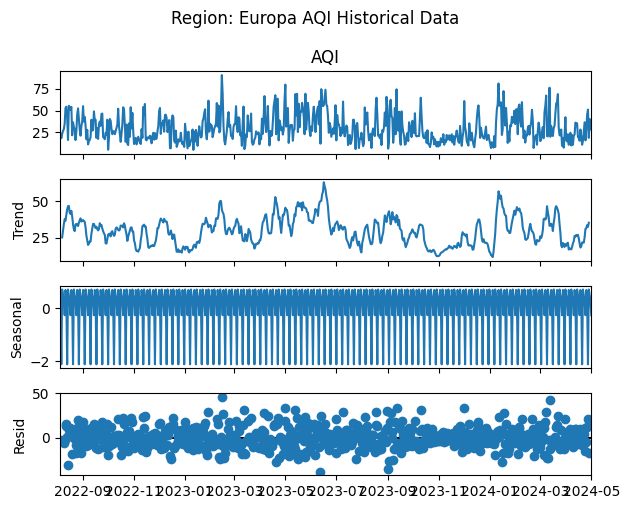

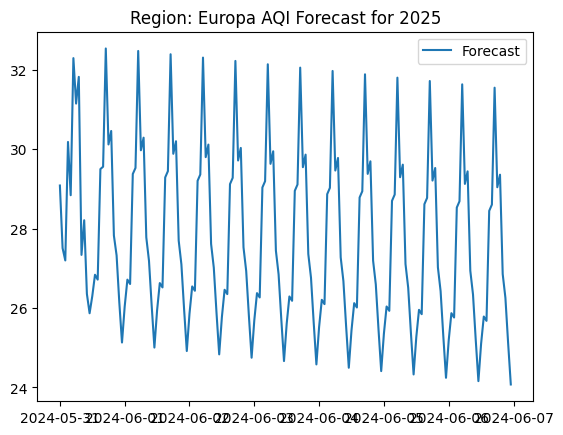

Region: USA


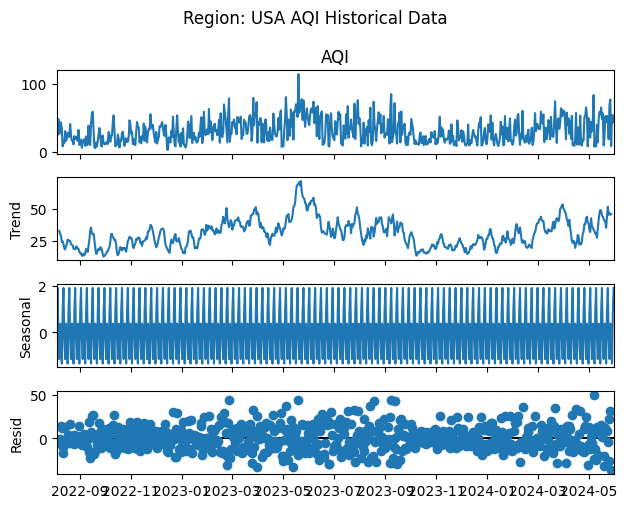

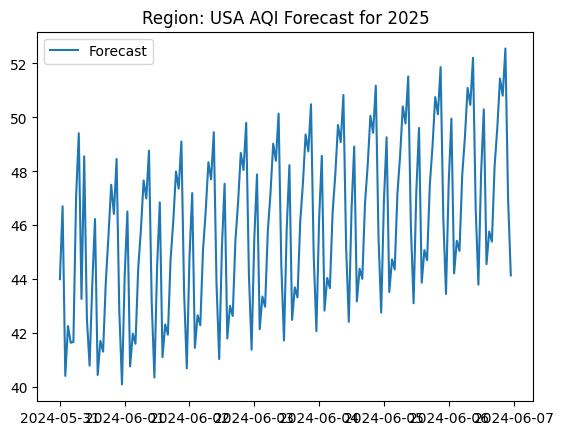

In [52]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv('Source.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# region 별로 그룹화
grouped = df.groupby('region')

for name, group in grouped:
    print(f"Region: {name}")
    # 중복된 인덱스 확인 및 제거
    if group.index.duplicated().any():
        group = group[~group.index.duplicated(keep='first')]
    
    # 데이터의 빈도 설정 (예: 매일 데이터인 경우 'D')
    group = group.asfreq('D')
    
    # 2024년까지의 데이터만 선택
    historical_data = group[group.index.year <= 2024]
    
    # 시계열 데이터의 계절성 분해 및 그래프 그리기 (이전 데이터)
    result = seasonal_decompose(historical_data['AQI'], model='additive')
    fig = result.plot()
    fig.suptitle(f"Region: {name} AQI Historical Data", y=1.05)
    plt.show()
    
    # SARIMAX 모델을 사용하여 2025년 데이터 예측
    model = SARIMAX(historical_data['AQI'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    result = model.fit()
    forecast = result.get_forecast(steps=168)  # 2024 05 31 ~ 2024 06 06
    forecast_index = pd.date_range(start='2024-05-31', periods=168, freq='H')
    
    # 예측 데이터 그래프 그리기
    plt.figure()
    plt.plot(forecast_index, forecast.predicted_mean, label='Forecast')
    plt.title(f"Region: {name} AQI Forecast for 1 week (2024-05-31 ~ 2024-06-06)")
    plt.legend()
    plt.show()

In [61]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
df= pd.read_csv('Source.csv')
# 각 열의 데이터 타입 확인
print(df.dtypes)

# 숫자가 아닌 열을 숫자형으로 변환
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 결측치 처리
df.dropna(inplace=True)

# 모델 학습
sarima_res = SARIMAX(df, order=(1, 1, 0), seasonal_order=(1, 1, 2, 12)).fit()

# 모델 요약 정보 출력
sarima_res.summary()

date                                   object
carbon_monoxide                       float64
nitrogen_dioxide                      float64
sulphur_dioxide                       float64
ozone                                 float64
dust                                  float64
uv_index                              float64
temperature_2m (°C)                   float64
wind_speed_10m (km/h)                 float64
wind_direction_10m (°)                  int64
soil_temperature_0_to_100cm (°C)      float64
soil_temperature_100_to_255cm (°C)    float64
soil_moisture_0_to_100cm (m³/m³)      float64
soil_moisture_100_to_255cm (m³/m³)    float64
direction                              object
region                                 object
AQI                                   float64
dtype: object


ValueError: SARIMAX models require univariate `endog`. Got shape (0, 17).

In [63]:

df= pd.read_csv('Source.csv')
# df에서 단변량 시계열 데이터 선택 (예: 'target_column'을 사용)
target_column = 'AQI'
df[target_column] = pd.to_numeric(df[target_column], errors='coerce')
df.dropna(subset=[target_column], inplace=True)

if not df.empty:
    sarima_res = SARIMAX(df[target_column], order=(1, 1, 0), seasonal_order=(1, 1, 2, 12)).fit()
    print(sarima_res.summary())
else:
    print("데이터가 충분하지 않습니다.")

                                        SARIMAX Results                                        
Dep. Variable:                                     AQI   No. Observations:                47280
Model:             SARIMAX(1, 1, 0)x(1, 1, [1, 2], 12)   Log Likelihood             -135761.574
Date:                                 Mon, 10 Jun 2024   AIC                         271533.147
Time:                                         16:07:31   BIC                         271576.965
Sample:                                              0   HQIC                        271546.909
                                               - 47280                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2819      0.002    153.074      0.000       0.278       0

In [67]:
!pip install Cython numpy
!pip install pystan==2.19.1.1 --no-use-pep517
!pip install fbprophet

  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pystan
Failed to build pystan


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [4 lines of output]
      C:\Users\mine\AppData\Local\Temp\pip-install-aky70e2o\pystan_35e3b142ef334e7e8db34ede03a552cb\setup.py:61: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
        self.version = node.value.s
      Cython>=0.22 and NumPy are required.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
ERROR: Could not build wheels for pystan, which is required to install pyproject.toml-based projects


  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached cmdstanpy-0.9.5-py3-none-any.whl.metadata (2.9 kB)
  Using cached pystan-3.9.1-py3-none-any.whl.metadata (3.7 kB)
  Using cached setuptools_git-1.2-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl.metadata (1.6 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pystan-3.9.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.8.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached pystan-3.7.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.6.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.5.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.4.0-py3-none-any.whl.metadata (3.7 kB)
  Using cached pystan-3.3.0-py3-none-any.whl.metadata (3.6 kB)

  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [59 lines of output]
      C:\Users\mine\AppData\Local\Temp\pip-install-lqmwnfv7\fbprophet_a59a06b9b7e749ed8f0a9fbf0bb9f3d4\setup.py:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
        from pkg_resources import (
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib
      creating build\lib\fbprophet
      creating build\lib\fbprophet\stan_model
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\mine\AppData\Local\Temp\pip-install-lqmwnfv7\fbprophet_a59a06b9b7e749ed8f0a9fbf0bb9f3d4\setup.py", line 122, in <module>
          setup(
        File "C:\Users\mine\AppData\Local\Programs\Python\Python312\Lib\site-packa

In [64]:
from fbprophet import Prophet
import pandas as pd

# Prophet 모델 초기화
model = Prophet()

# 모델을 데이터에 적합시킴
model.fit(df)

# 예측할 기간을 정의 (2024-05-31부터 2024-06-06까지)
future_dates = model.make_future_dataframe(periods=7)
future_dates.tail(7)  # 마지막 7일을 확인

# 예측 수행
forecast = model.predict(future_dates)

# 예측 결과 중 관심 있는 부분만 선택하여 출력
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

ModuleNotFoundError: No module named 'fbprophet'